# First tries DeepSource


In [14]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
from astropy.io import fits
from tqdm import tqdm

import myUtils
import deepsource as ds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
data_path = '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync'
keys = np.load(os.path.join(data_path, "Sources_detection/sky_keys.npy"))
indices = np.load(os.path.join(data_path, "Sources_detection/seed_0/test_idx.npy"))

print(len(keys))
print(len(indices))

9164
916


In [16]:
images_path = []   # list containing all the fits file path for the test 

for ind in indices:
    key = keys[ind]

    data = os.path.join(data_path, 'clean_gaussian', "clean_gaussians_" + key + ".fits")
    images_path.append(data)


In [17]:
listRealDetection = myUtils.loadAllCatFile("/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/Sources_detection/cat", "gaussians_", indices, keys)
print(len(listRealDetection))
print(listRealDetection[0])

916
[[1.49061667e+02 3.62005556e+00 1.71017102e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.94639464e-01 6.52025203e-01
  3.17479748e+02]
 [1.49060556e+02 3.61505556e+00 9.79297930e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.17091709e-01 4.19801980e-01
  1.36093609e+01]]


In [6]:
# compute the pixels index of ground truth positions
listRealDetection_px = []
for ind in tqdm(range(len(listRealDetection))):
    listRealDetection_px.append(myUtils.RaDec2pixels(listRealDetection[ind], fits.getheader(images_path[ind])))

100%|██████████| 916/916 [00:04<00:00, 214.36it/s]


In [18]:
for tt in listRealDetection:
    print(np.array(tt).shape)

(2, 9)
(3, 9)
(5, 9)
(1, 9)
(3, 9)
(2, 9)
(1, 9)
(4, 9)
(3, 9)
(4, 9)
(1, 9)
(5, 9)
(2, 9)
(1, 9)
(5, 9)
(4, 9)
(1, 9)
(2, 9)
(2, 9)
(5, 9)
(1, 9)
(5, 9)
(2, 9)
(3, 9)
(1, 9)
(5, 9)
(5, 9)
(1, 9)
(1, 9)
(1, 9)
(4, 9)
(5, 9)
(2, 9)
(4, 9)
(5, 9)
(3, 9)
(2, 9)
(3, 9)
(5, 9)
(5, 9)
(1, 9)
(4, 9)
(5, 9)
(4, 9)
(1, 9)
(1, 9)
(2, 9)
(1, 9)
(5, 9)
(2, 9)
(3, 9)
(4, 9)
(1, 9)
(2, 9)
(5, 9)
(3, 9)
(5, 9)
(2, 9)
(1, 9)
(5, 9)
(2, 9)
(4, 9)
(4, 9)
(4, 9)
(4, 9)
(1, 9)
(2, 9)
(3, 9)
(4, 9)
(4, 9)
(2, 9)
(5, 9)
(5, 9)
(3, 9)
(4, 9)
(1, 9)
(1, 9)
(4, 9)
(5, 9)
(2, 9)
(3, 9)
(3, 9)
(4, 9)
(4, 9)
(2, 9)
(3, 9)
(4, 9)
(3, 9)
(5, 9)
(5, 9)
(5, 9)
(1, 9)
(4, 9)
(4, 9)
(3, 9)
(3, 9)
(4, 9)
(1, 9)
(1, 9)
(3, 9)
(2, 9)
(3, 9)
(3, 9)
(1, 9)
(3, 9)
(5, 9)
(5, 9)
(2, 9)
(2, 9)
(3, 9)
(1, 9)
(5, 9)
(4, 9)
(4, 9)
(5, 9)
(2, 9)
(2, 9)
(5, 9)
(3, 9)
(3, 9)
(1, 9)
(1, 9)
(4, 9)
(1, 9)
(1, 9)
(5, 9)
(2, 9)
(5, 9)
(3, 9)
(3, 9)
(1, 9)
(1, 9)
(4, 9)
(1, 9)
(2, 9)
(5, 9)
(2, 9)
(1, 9)
(4, 9)
(3, 9)
(4, 9)
(5, 9)
(1, 9)

In [7]:
writingModelFile_path = '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/modelDeepSource/clean_gaussian'
myUtils.writingModel(writingModelFile_path, listRealDetection, 'clean_gaussians_', indices, keys)

In [8]:
models_path = []   # list containing all the fits file path for the test 

for ind in indices:
    key = keys[ind]

    data = os.path.join(writingModelFile_path, "clean_gaussians_" + key + ".txt")
    models_path.append(data)
len(models_path)


916

In [9]:
print(images_path[0])
print(models_path[0])

/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_1b389198-5a06-4fa9-868e-f6edcdac7692.fits
/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/modelDeepSource/clean_gaussian/clean_gaussians_1b389198-5a06-4fa9-868e-f6edcdac7692.txt


number of files:  1 , number of channels:  1


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


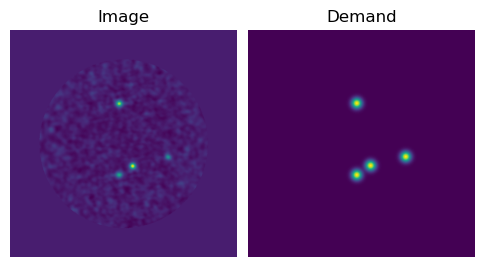

In [10]:
def kernels(cat):
    out = ds.horn_kernel(cat,radius=10,step_height=2)
    return ds.gaussian_kernel(out,sigma=7)

patch_size = 510
# ppdp = ds.GeneralDataProvider(images_path=images_path[:4],models_path=models_path[:4], margin=0, nx=patch_size, ny=patch_size,kernels=kernels, b_n=0.05, alpha=0)
ppdp = ds.GeneralDataProvider(images_path=['/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_0a543e5b-3e32-4f96-94a3-8da6d8bd12f8.fits'],models_path=['/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/modelDeepSource/clean_gaussian/clean_gaussians_0a543e5b-3e32-4f96-94a3-8da6d8bd12f8.txt'], margin=0, nx=patch_size, ny=patch_size,kernels=kernels, b_n=0.05, alpha=0)


x,y = ppdp(1)
x = np.nan_to_num(x, 0)
y = np.nan_to_num(y, 0)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(6,3)) 

ax = plt.subplot(gs[0, 0])
ax.imshow(x[0,:,:,0])
ax.set_title('Image')
plt.axis('off')

ax = plt.subplot(gs[0, 1])
ax.imshow(y[0,:,:,0])
ax.set_title('Demand')
plt.axis('off');

plt.subplots_adjust(wspace=0.05)

number of files:  5 , number of channels:  1


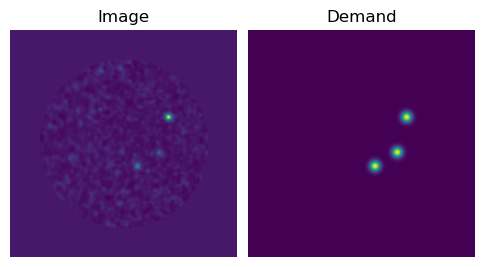

In [11]:
ppdp = ds.GeneralDataProvider(images_path=images_path[:5],models_path=models_path[:5], margin=0, nx=patch_size, ny=patch_size,kernels=kernels, b_n=0.05, alpha=0)

x,y = ppdp(1)
x = np.nan_to_num(x, 0)
y = np.nan_to_num(y, 0)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(6,3)) 

ax = plt.subplot(gs[0, 0])
ax.imshow(x[0,:,:,0])
ax.set_title('Image')
plt.axis('off')

ax = plt.subplot(gs[0, 1])
ax.imshow(y[0,:,:,0])
ax.set_title('Demand')
plt.axis('off');

plt.subplots_adjust(wspace=0.05)

In [12]:
ppdp = ds.GeneralDataProvider(images_path=images_path,models_path=models_path, margin=0, nx=510, ny=510,kernels=kernels, b_n=0.05, alpha=0)

model_add = './cmodel'
restore = os.path.exists(model_add)

cnn = ds.ConvolutionalLayers(nx=patch_size,n_channel=1,restore=restore,model_add=model_add,arch_file_name='arch')

cnn.train(ppdp,training_epochs=1,learning_rate = 0.01,n_s=1,dropout=0.2,verbose=10)


number of files:  916 , number of channels:  1


/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` shou

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Restoring parameters from ./cmodel/model


2022-12-07 18:10:24.562110: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 18:10:24.616918: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)


Epoch:0, cost= 534.246474


/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/deepsource-0.1.0-py3.9.egg/deepsource/ps_extract.py:57: RuntimeWarning: invalid value encountered in divide
  xp = xp/xp.max()


0  point sources are found!
0  points are in noisy borders!
[]


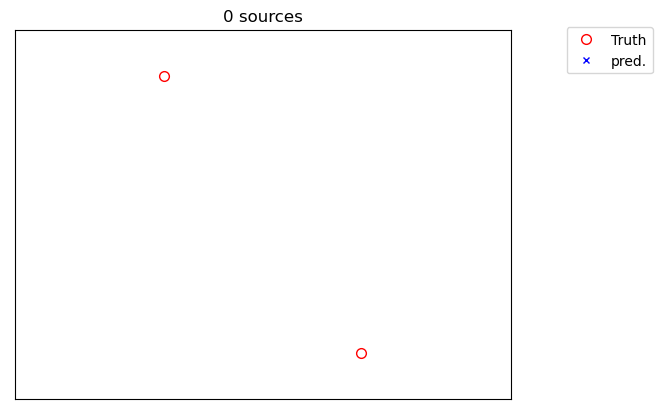

In [13]:
image_file = images_path[0]
model_file = models_path[0]

catalog = ds.ps_extract(image_file,model_file,cnn,ds.fetch_data,loc_det='mean',ignore_border=0,jump_lim=3,area_lim=0,threshold_0=1.,lw=510,pad=1,verbose=False,useNetwork=True)
ds.visualize_cross_match(image_file,model_file,catalog,border=30)
print(catalog[:,:2])

# Baseline - Try the source detection without the NN

In [11]:
ppdp = ds.GeneralDataProvider(images_path=images_path,models_path=models_path, margin=0, nx=510, ny=510,kernels=kernels, b_n=0.05, alpha=0)

model_add = './cmodel'
restore = os.path.exists(model_add)

cnn = ds.ConvolutionalLayers(nx=patch_size,n_channel=1,restore=restore,model_add=model_add,arch_file_name='arch')

cnn.train(ppdp,training_epochs=1,learning_rate = 0.01,n_s=1,dropout=0.2,verbose=10)


number of files:  916 , number of channels:  1


/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Users/patoch/opt/anaconda3/envs/deepsource_env/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` shou

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Restoring parameters from ./cmodel/model


2022-11-30 12:27:38.641419: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 12:27:38.685601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)


Epoch:0, cost= 602.552106


19  point sources are found!
17  points are in noisy borders!
[[257.  77.]
 [234. 122.]
 [136. 132.]
 [205. 156.]
 [378. 168.]
 [293. 236.]
 [387. 240.]
 [382. 248.]
 [ 80. 256.]
 [359. 260.]
 [305. 264.]
 [374. 291.]
 [432. 315.]
 [364. 323.]
 [166. 336.]
 [341. 343.]
 [294. 346.]
 [299. 381.]
 [272. 441.]]


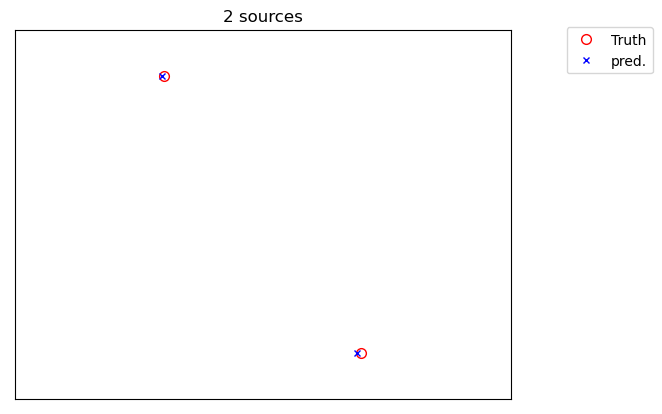

In [12]:
image_file = images_path[0]
model_file = models_path[0]

catalog = ds.ps_extract(image_file,model_file,cnn,ds.fetch_data,loc_det='mean',ignore_border=0,jump_lim=3,area_lim=0,threshold_0=1.,lw=510,pad=1,verbose=False,useNetwork=False)
ds.visualize_cross_match(image_file,model_file,catalog,border=30)
print(catalog[:,:2])

## Compute purity and completeness:
### Getting the detected sources for the whole test set

In [13]:
%%capture
listDetectedSources = []
for i in tqdm(range(len(images_path))):
    image_file = images_path[i]
    model_file = models_path[i]
    catalog = ds.ps_extract(image_file,model_file,cnn,ds.fetch_data,loc_det='mean',ignore_border=10,jump_lim=3,area_lim=0,threshold_0=1.,lw=510,pad=10,verbose=False,useNetwork=False)
    listDetectedSources.append(catalog[:,:2].T)

In [14]:
print(len(listDetectedSources))

916


### Compute purity and completeness

In [15]:
print(listDetectedSources[0])
print(listRealDetection_px[0])

[[257. 234. 136. 205. 378. 293. 387. 382.  80. 359. 305. 374. 432. 364.
  166. 341. 294. 299. 272.]
 [ 77. 122. 132. 156. 168. 236. 240. 248. 256. 260. 264. 291. 315. 323.
  336. 343. 346. 381. 441.]]
[[166. 206.]
 [336. 156.]]


In [16]:
resAllComparison = myUtils.compareRealAndDetectedSources_pixels(listDetectedSources, listRealDetection_px)
print("Result (TP, FP, FN): ", resAllComparison)

Result (TP, FP, FN):  [ 2655 13784   181]


In [17]:
purityAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[1])
CompletnessAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[2])
print("Purity: ", purityAll)
print("Completness: ", CompletnessAll)

Purity:  0.16150617434150497
Completness:  0.9361777150916785


In [18]:
np.array(listDetectedSources[1]).T.shape

(11, 2)

## Try to match the completeness obtained from karabo

In [19]:
%%capture
listDetectedSources = []
for i in tqdm(range(len(images_path))):
    image_file = images_path[i]
    model_file = models_path[i]
    catalog = ds.ps_extract(image_file,model_file,cnn,ds.fetch_data,loc_det='peak',ignore_border=10,jump_lim=2,area_lim=105,threshold_0=4,lw=510,pad=10,verbose=False,useNetwork=False)
    listDetectedSources.append(catalog[:,:2].T)

In [20]:
resAllComparison = myUtils.compareRealAndDetectedSources_pixels(listDetectedSources, listRealDetection_px)
print("Result (TP, FP, FN): ", resAllComparison)

Result (TP, FP, FN):  [2491  144  345]


In [21]:
purityAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[1])
CompletnessAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[2])
print("Purity: ", purityAll)
print("Completness: ", CompletnessAll)

Purity:  0.9453510436432637
Completness:  0.8783497884344147


# With the noisy DataSet


In [22]:
images_path_noisy = []   # list containing all the fits file path for the test 

for ind in indices:
    key = keys[ind]

    data = os.path.join(data_path, 'clean_noisy', "clean_noisy_gaussians_" + key + ".fits")
    images_path_noisy.append(data)

In [23]:
%%capture
listDetectedSources = []
for i in tqdm(range(len(images_path_noisy))):
    image_file = images_path_noisy[i]
    model_file = models_path[i]
    catalog = ds.ps_extract(image_file,model_file,cnn,ds.fetch_data,loc_det='peak',ignore_border=10,jump_lim=2,area_lim=105,threshold_0=1,lw=510,pad=10,verbose=False,useNetwork=False)
    listDetectedSources.append(catalog[:,:2].T)

In [24]:
resAllComparison = myUtils.compareRealAndDetectedSources_pixels(listDetectedSources, listRealDetection_px)
purityAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[1])
CompletnessAll = resAllComparison[0] / (resAllComparison[0] + resAllComparison[2])

print("Purity: ", purityAll)
print("Completness: ", CompletnessAll)
print("Result (TP, FP, FN): ", resAllComparison)

Purity:  1.0
Completness:  0.012693935119887164
Result (TP, FP, FN):  [  36    0 2800]


In [25]:
tmp = np.load('/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/Re&Im_st.1/test_seed_0.npy')
tmp.shape

(916, 512, 512)

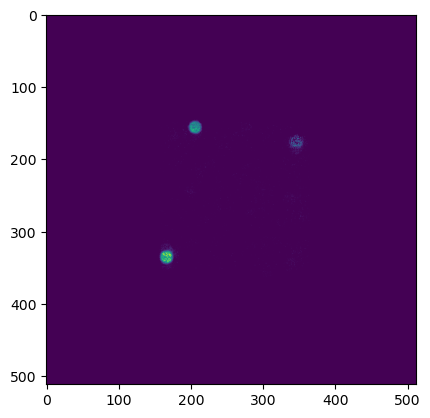

In [27]:
plt.imshow(tmp[0,:,:])